In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.externals import joblib

In [4]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data from file

In [6]:
merged_data = pd.read_pickle('merged_data_pct_change.pkl')

# Create train data and test data

In [7]:
X = merged_data['rawText']
y = merged_data['1day pct change']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Tf-Idf

### Load from file

In [9]:
#tfidf = joblib.load('tfidf_lemmatokenizer__maxdf0_4__mindf300.pkl')

In [10]:
#tfidf_vectors = tfidf.transform(X_train)

### Recreate vectorizer from scratch

In [11]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t.lower(), 'v') for t in word_tokenize(doc)]

In [12]:
tfidf = TfidfVectorizer(max_df=0.4, min_df=300, ngram_range=(1,2),tokenizer=LemmaTokenizer(), stop_words='english')

In [13]:
tfidf_vectors = tfidf.fit_transform(X_train)

In [14]:
#joblib.dump(tfidf, 'tfidf_lemmatokenizer__maxdf0_4__mindf300.pkl')

# DNN model

In [15]:
dense_tfidf_vectors = tfidf_vectors.toarray()

In [16]:
# define base model
def baseline_model():
    model = Sequential()
    model.add(Dense(300, input_dim=dense_tfidf_vectors.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [17]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=3)

In [18]:
'''
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
'''

'\nkfold = KFold(n_splits=10)\nresults = cross_val_score(estimator, dense_tfidf_vectors, y_train, cv=kfold)\nprint("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))\n'

In [19]:
estimator.fit(dense_tfidf_vectors, y_train)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [20]:
test_vectors = tfidf.transform(X_test)

In [21]:
test_vectors = test_vectors.toarray()

In [22]:
y_predicted = estimator.predict(test_vectors)

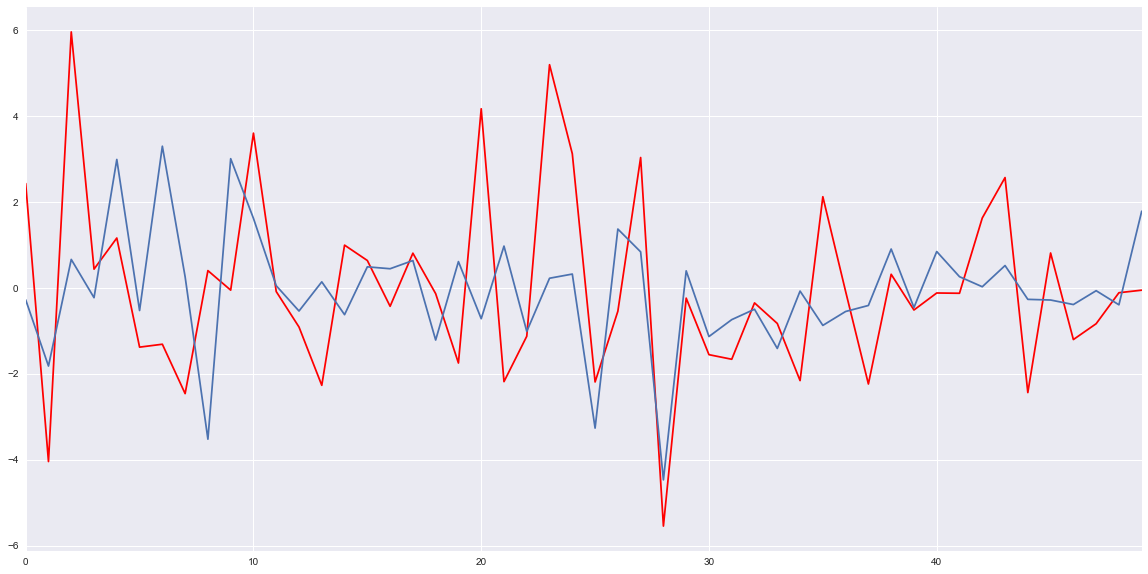

In [23]:
plt.figure(figsize=(20,10))
sns.tsplot(y_test[0:50], color='r')
sns.tsplot(y_predicted[0:50])

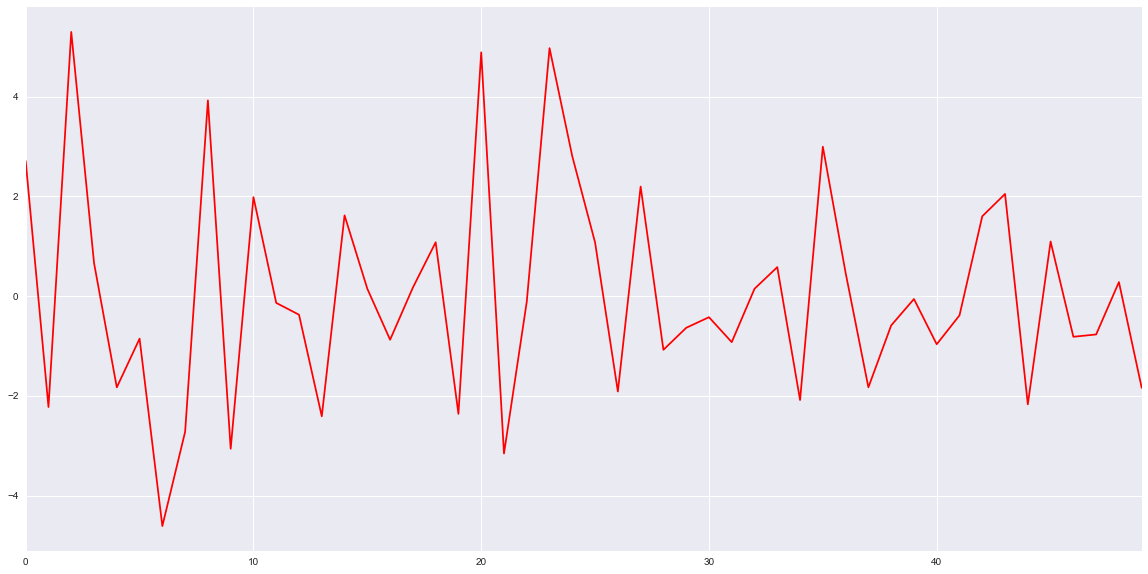

In [24]:
plt.figure(figsize=(20,10))
#sns.tsplot(y_test[0:50])
error = y_test-y_predicted
sns.tsplot(error[0:50], color='r')

In [25]:
error_value = mean_squared_error(y_test, y_predicted)

In [26]:
error_value

9.013319733805087